In [9]:
import pandas as pd 
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

### acquiring data

In [2]:
df = prepare.wrangle()

In [3]:
df.head()

,REPORTDATE,STATION,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,street_address,city,zip_code,something1,something2
0,2009-01-14,USW00012921,3.8,1357.0,1357.0,0.0,0.0,0.0,0.0,66,...,3,2135774.0,13677402.0,6/20/2019,6/20/2020,Mission Parkway,3400 MISSION RD,SAN ANTONIO,78214,None
1,2009-01-14,USW00012921,3.8,1357.0,1357.0,0.0,0.0,0.0,0.0,66,...,3,2136976.0,13676434.0,6/20/2019,6/20/2020,Mission Parkway,7484 MISSION PKWY,SAN ANTONIO,None,None
2,2009-01-14,USW00012921,3.8,1357.0,1357.0,0.0,0.0,0.0,0.0,66,...,3,2136440.0,13676752.0,6/20/2019,6/20/2020,Mission Parkway,3600 MISSION PKWY,SAN ANTONIO,78214,None
3,2009-01-14,USW00012921,3.8,1357.0,1357.0,0.0,0.0,0.0,0.0,66,...,3,2136440.0,13676752.0,6/20/2019,6/20/2020,Mission Parkway,3600 MISSION PKWY,SAN ANTONIO,78214,None
4,2009-01-14,USW00012921,3.8,1357.0,1357.0,0.0,0.0,0.0,0.0,66,...,3,2136141.0,13678038.0,6/20/2019,6/20/2020,Mission Parkway,0 PADRE DR,SAN ANTONIO,78214,None


# are cause and rainfall related?

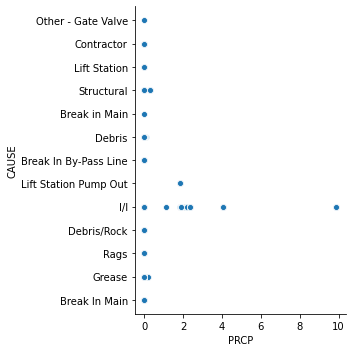

In [4]:
sns.relplot(y="CAUSE", x="PRCP", data=df)

#### It appears that these are the initially stated causes that happen under higher than normal precipitation
- Lift station pump out
- structuarl damages
- I/I
- Grease

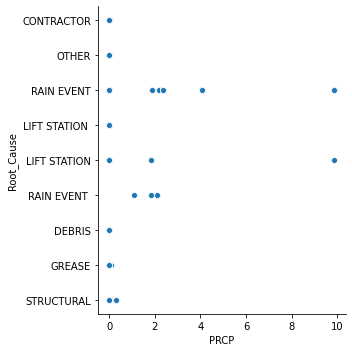

In [5]:
sns.relplot(y="Root_Cause", x="PRCP", data=df)

#### These are the officially determined root issues that are causing damages in high precipitation enviroments
- Rain Event
- Lift Station
- Grease
- Structural

### Are temperature and root cause related?


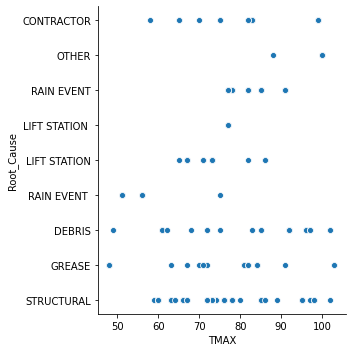

In [8]:
sns.relplot(x="TMAX", y="Root_Cause", data=df)

#### Doesn't appear so

#### Lets check it out with a bar chart

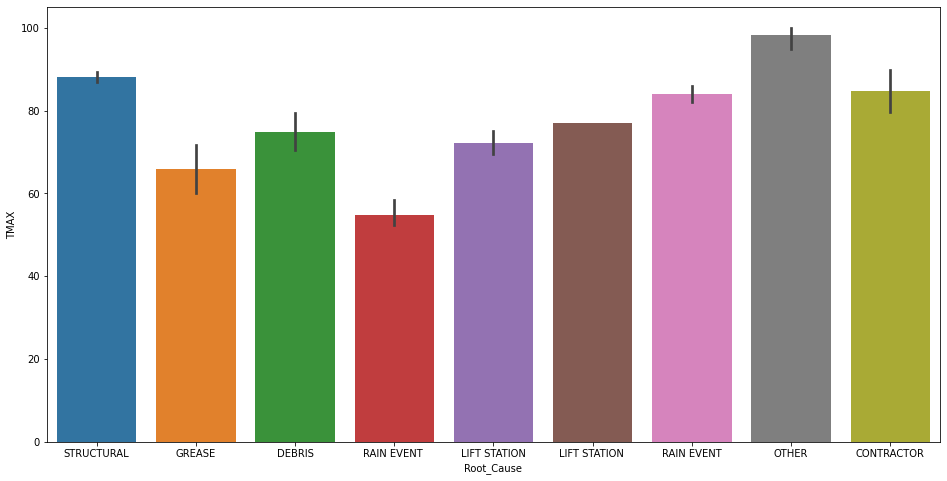

In [12]:
plt.figure(figsize=(16,8))
sns.barplot(x='Root_Cause', y="TMAX", data=df)

#### now a swarm plot

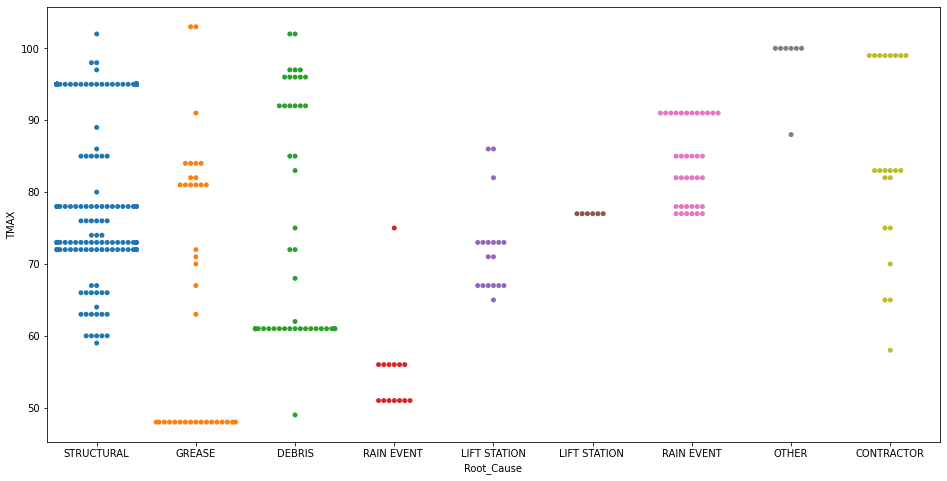

In [14]:
plt.figure(figsize=(16,8))
sns.swarmplot(x='Root_Cause', y="TMAX", data=df)

#### what about low temps?

<Figure size 1152x576 with 0 Axes>

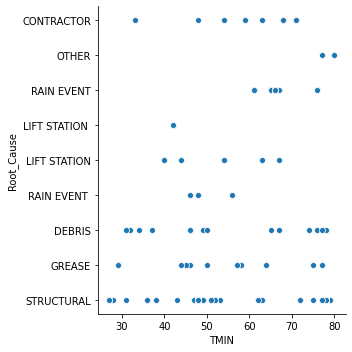

In [16]:
plt.figure(figsize=(16,8))
sns.relplot(y="Root_Cause", x="TMIN", data=df)

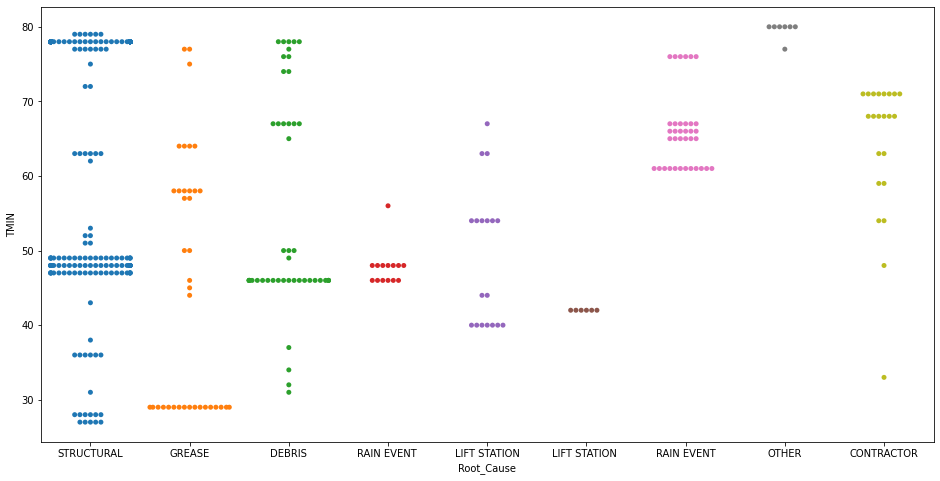

In [17]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="Root_Cause", y="TMIN", data=df)

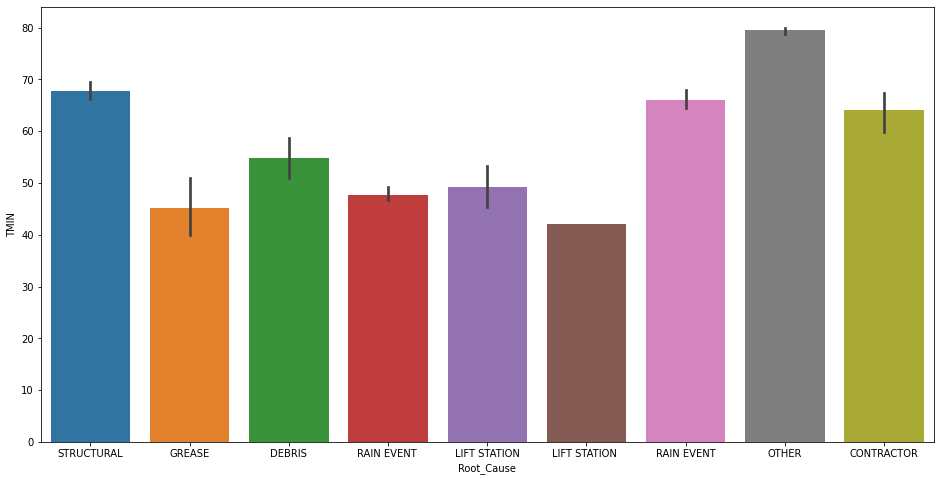

In [18]:
plt.figure(figsize=(16,8))
sns.barplot(x="Root_Cause", y="TMIN", data=df)

#### the "Other" variable seems to have higher than normal temperatures when damage is happening. I wonder how many observations there are

In [19]:
df.groupby("Root_Cause").count()

,REPORTDATE,STATION,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,street_address,city,zip_code,something1,something2
Root_Cause,,,,,,,,,,,,,,,,,,,,,
CONTRACTOR,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,6,6,5,0
DEBRIS,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,28,28,27,0
GREASE,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,28,28,27,0
LIFT STATION,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,12,12,10,0
LIFT STATION,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,5,0
OTHER,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,6,6,5,0
RAIN EVENT,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,30,0
RAIN EVENT,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,12,12,10,0
STRUCTURAL,338,338,338,338,338,338,338,338,338,338,...,338,338,338,338,338,338,318,318,311,0


#### 7 observations

In [24]:
mask = df[df.Root_Cause == "OTHER"]

In [27]:
mask['CAUSE']

402    Structural
423    Structural
424    Structural
425    Structural
426    Structural
427    Structural
428    Structural
Name: CAUSE, dtype: object

#### They're all structural damages